In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df=pd.read_csv('/spam.csv', encoding='latin-1') #Try reading the file with 'latin-1' encoding. If this doesn't work, try other encodings like 'ISO-8859-1'.

In [19]:
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2649,ham,You might want to pull out more just in case a...,NaN,NaN,NaN


In [20]:
df.shape

(5572, 5)

In [ ]:
#1.Data Cleaning
#2.EDA
#3.Text Preprocessing
#4.Model building
#5.Evaluation
#6.Improvement
#7.Website creation
#8.Deployment


**Data Cleaning**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [24]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [25]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [26]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [32]:
df['target']=encoder.fit_transform(df['target'])

In [33]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df.isnull().sum()

,0
target,0
text,0


In [36]:
df.duplicated().sum()

403

In [38]:
df=df.drop_duplicates(keep='first')

In [39]:
df.shape

(5169, 2)

Exploratory Data Analysis

In [40]:
df['target'].value_counts()

,count
target,
0,4516
1,653


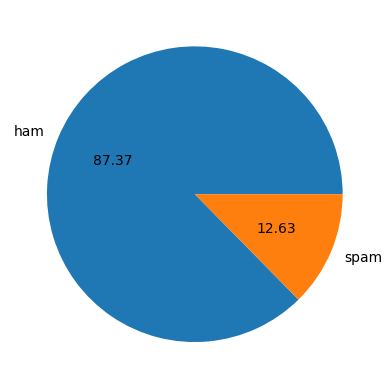

In [41]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#Data is imbalanced

In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
df['num_characters']=df['text'].apply(len)

<ipython-input-44-2d4713a058a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [45]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-48-63c504269349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [49]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-49-756a7156c0d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [51]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


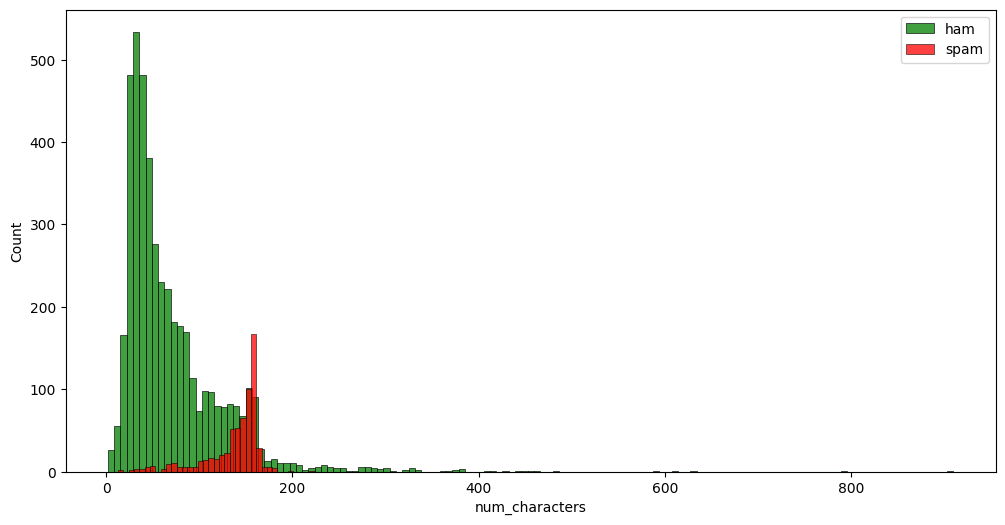

In [55]:


plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'],color='green',label='ham')
sns.histplot(df[df['target'] == 1]['num_characters'],color='red',label='spam')
plt.legend(loc='upper right')
plt.show()


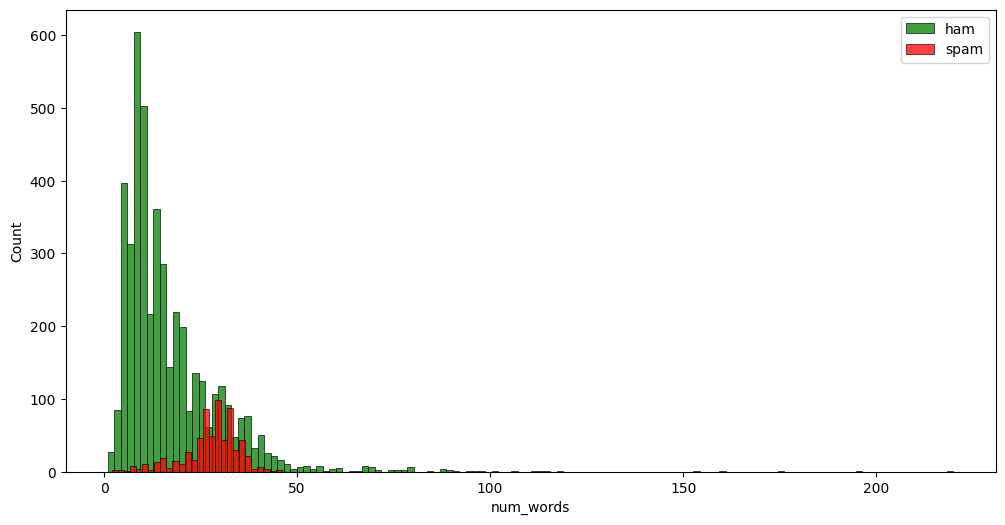

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'],color='green',label='ham')
sns.histplot(df[df['target'] == 1]['num_words'],color='red',label='spam')
plt.legend(loc='upper right')
plt.show()

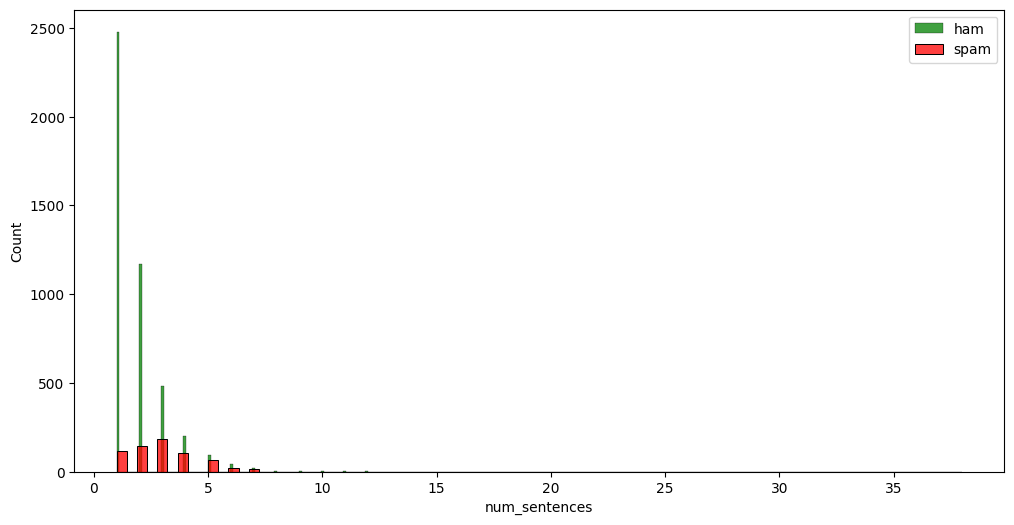

In [57]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'],color='green',label='ham')
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red',label='spam')
plt.legend(loc='upper right')
plt.show()

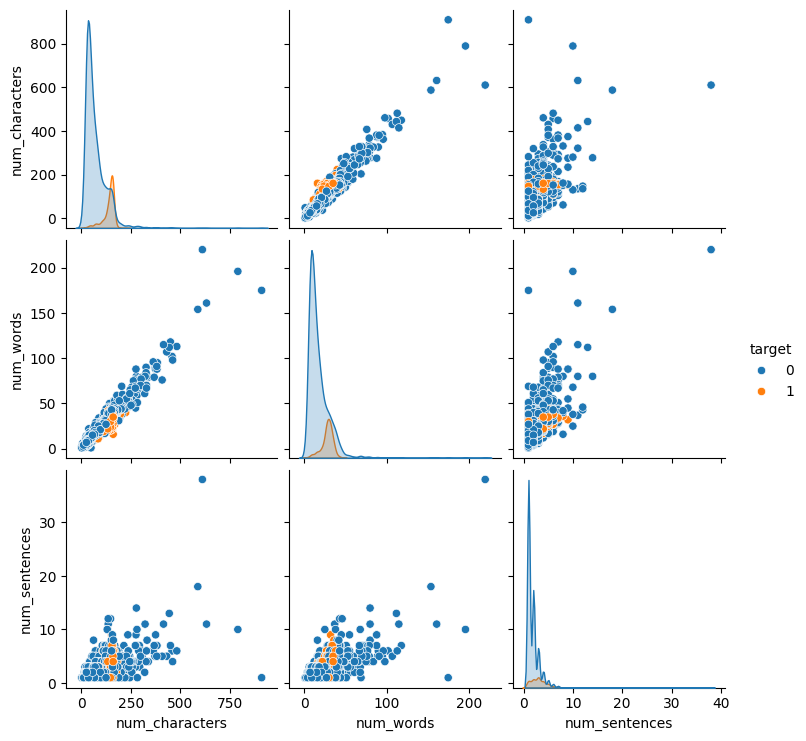

In [58]:
sns.pairplot(df,hue='target')

<ipython-input-67-056323b7633e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = pd.to_numeric(df['target'])


<Axes: >

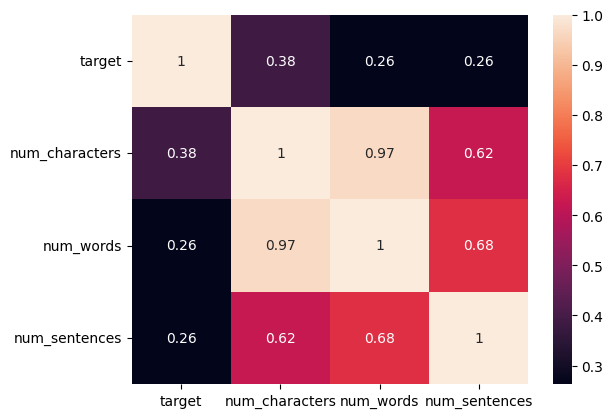

In [67]:
# Convert 'target' column to numeric type if it's not already
df['target'] = pd.to_numeric(df['target'])

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix and generate heatmap
sns.heatmap(numeric_df.corr(), annot=True)




In [ ]:
#Keep num_characters only because of strong correlation between added three columns

**TEXT PREPROCESSING**

In [91]:
import nltk
nltk.download('stopwords')
import string


def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
    text=y[:]
    y.clear()
    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)
    text=y[:]
    y.clear()
    for i in text:
      y.append(ps.stem(i))

  return " ".join(y)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
df['transformed_text']=df['text'].apply(transform_text)


<ipython-input-98-98fa9b97913c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [103]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [104]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

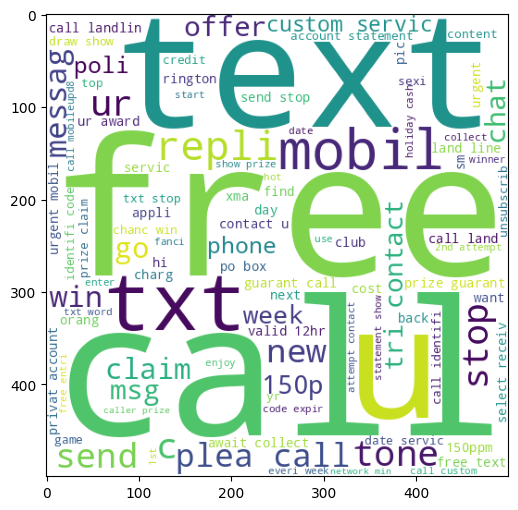

In [107]:
plt.figure(figsize=(15,6))

plt.imshow(spam_wc)

In [108]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

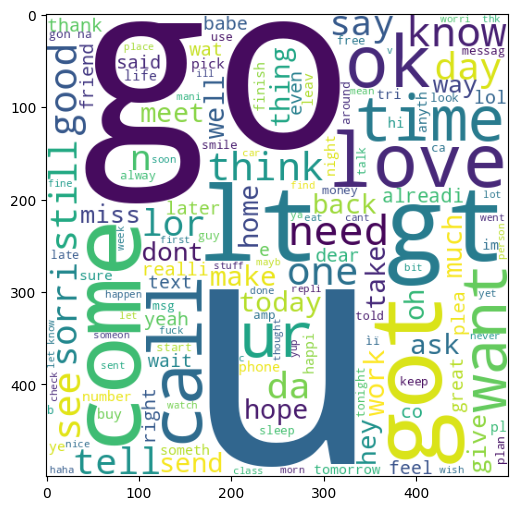

In [109]:
plt.figure(figsize=(15,6))

plt.imshow(ham_wc)

In [126]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


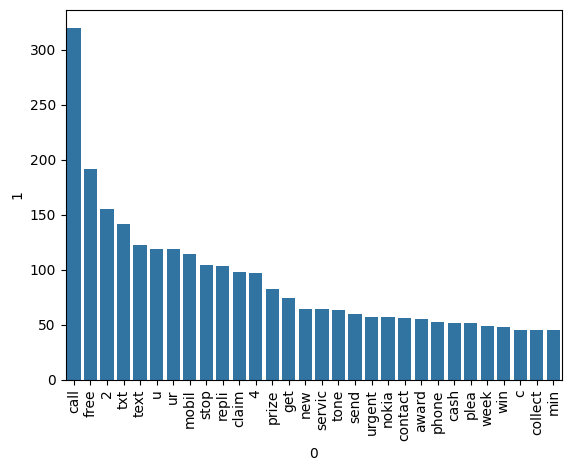

In [127]:
from collections import Counter


df_spam_corpus = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=df_spam_corpus[0], y=df_spam_corpus[1])
plt.xticks(rotation='vertical')
plt.show()

In [123]:
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [128]:
len(ham_corpus)

35296

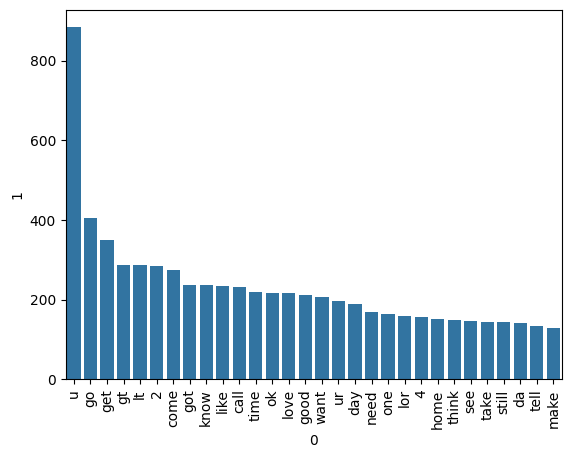

In [129]:

df_ham_corpus = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=df_ham_corpus[0], y=df_ham_corpus[1])
plt.xticks(rotation='vertical')
plt.show()

**BUILDING THE MACHINE LEARNING MODEL**

In [ ]:
#Text vectorisation using bag of words

In [164]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [165]:
x=tfidf.fit_transform(df['transformed_text']).toarray()


In [166]:
x.shape

(5169, 3000)

In [167]:
y=df['target'].values

In [168]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [169]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [170]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [171]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [172]:
gnb.fit(xtrain,ytrain)
ypred1=gnb.predict(xtest)
print(accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print(precision_score(ytest,ypred1))

0.8723404255319149
[[790 106]
 [ 26 112]]
0.5137614678899083


In [173]:
mnb.fit(xtrain,ytrain)
ypred2=mnb.predict(xtest)
print(accuracy_score(ytest,ypred2))
print(confusion_matrix(ytest,ypred2))
print(precision_score(ytest,ypred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [174]:
bnb.fit(xtrain,ytrain)
ypred3=bnb.predict(xtest)
print(accuracy_score(ytest,ypred3))
print(confusion_matrix(ytest,ypred3))
print(precision_score(ytest,ypred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
#We will go with multinomial naive bayes because of perfect precision

In [175]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

lrc = LogisticRegression()


svc = SVC(kernel='linear')

mnb = MultinomialNB()

dtc = DecisionTreeClassifier(criterion='entropy')


knn = KNeighborsClassifier()


rfc = RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, random_state=2)


bc = BaggingClassifier(n_estimators=50, random_state=2)

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)

xgb = XGBClassifier(n_estimators=50, random_state=2)


In [176]:


clfs = {
    'LR': lrc,
    'SVC': svc,
    'NB': mnb,
    'DT': dtc,
    'KN': knn,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbc,
    'xgb': xgb
}


In [177]:
def train_classifier(clf,xtrain,ytrain,xtest,ytest):
  clf.fit(xtrain,ytrain)
  y_pred=clf.predict(xtest)
  accuracy=accuracy_score(ytest,y_pred)
  precision=precision_score(ytest,y_pred)

  return accuracy,precision


In [178]:
train_classifier(svc,xtrain,ytrain,xtest,ytest)

(0.9787234042553191, 0.9754098360655737)

In [181]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,xtrain,ytrain,xtest,ytest)
  print("For",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For LR
Accuracy -  0.9555125725338491
Precision -  0.9791666666666666
For SVC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For NB
Accuracy -  0.971953578336557
Precision -  1.0
For DT
Accuracy -  0.941972920696325
Precision -  0.8095238095238095
For KN
Accuracy -  0.9061895551257253
Precision -  1.0
For RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9557522123893806
For BgC
Accuracy -  0.9564796905222437
Precision -  0.8604651162790697
For ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For GBDT
Accuracy -  0.9497098646034816
Precision -  0.9387755102040817
For xgb
Accuracy -  0.9690522243713733
Precision -  0.9491525423728814


In [182]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_depth3':accuracy_scores,'Precision_max_depth3':precision_scores}).sort_values('Precision_max_depth3',ascending=False)

In [183]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_depth3,Precision_max_depth3
0,NB,0.971954,1.000000,0.971954,1.000000
1,KN,0.906190,1.000000,0.906190,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609
3,LR,0.955513,0.979167,0.955513,0.979167
4,SVC,0.978723,0.975410,0.978723,0.975410
5,ETC,0.978723,0.975410,0.978723,0.975410
6,AdaBoost,0.966151,0.955752,0.966151,0.955752
7,xgb,0.969052,0.949153,0.969052,0.949153
8,GBDT,0.949710,0.938776,0.949710,0.938776
9,BgC,0.956480,0.860465,0.956480,0.860465


In [ ]:
#Multinomial NB is still the best performing model after hyperparameter tuning


In [184]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))